# Introduction to Linear Regression
The purpose of machine learning is often to create a model that explains some real-world data, so that we can predict what may happen next, with different inputs.

The simplest model that we can fit to data is a line. When we are trying to find a line that fits a set of data best, we are performing Linear Regression.

We often want to find lines to fit data, so that we can predict unknowns. For example:

- The market price of a house vs. the square footage of a house. Can we predict how much a house will sell for, given its size?
- The tax rate of a country vs. its GDP. Can we predict taxation based on a country’s GDP?
- The amount of chips left in the bag vs. number of chips taken. Can we predict how much longer this bag of chips will last, given how much people at this party have been eating?

Imagine that we had this set of weights plotted against heights of a large set of professional baseball players:

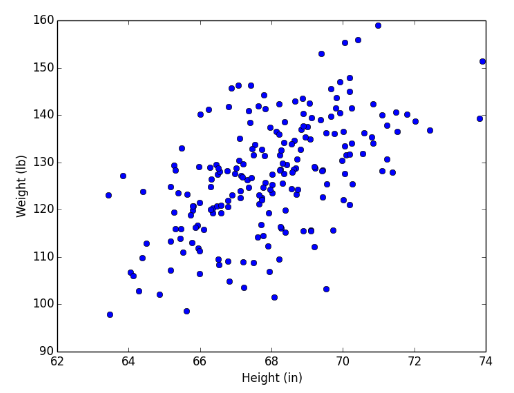

To create a linear model to explain this data, we might draw this line:

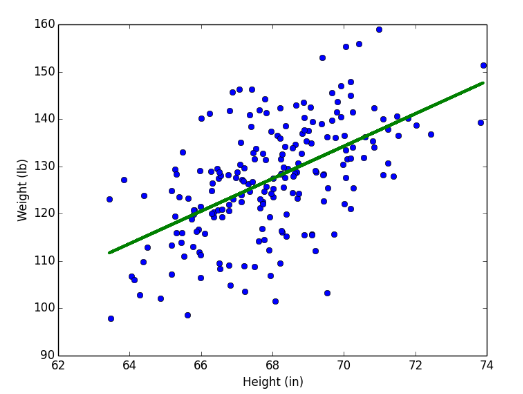

Now, if we wanted to estimate the weight of a player with a height of 73 inches, we could estimate that it is around 143 pounds.

A line is a rough approximation, but it allows us the ability to explain and predict variables that have a linear relationship with each other. In the rest of the lesson, we will learn how to perform Linear Regression.

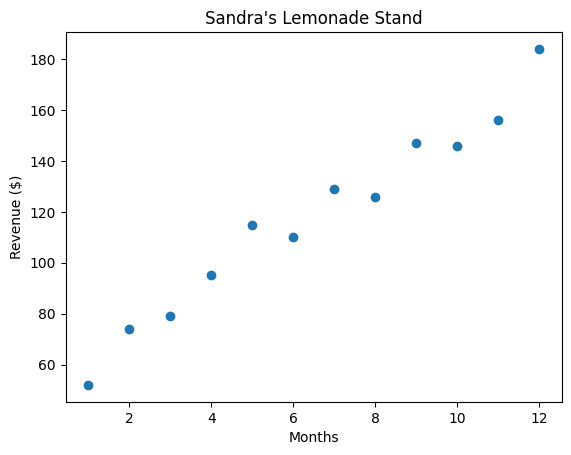

In [2]:
import matplotlib.pyplot as plt

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

plt.plot(months, revenue, "o")

plt.title("Sandra's Lemonade Stand")

plt.xlabel("Months")
plt.ylabel("Revenue ($)")

plt.show()

# What do you think the revenue in month 13 would be?


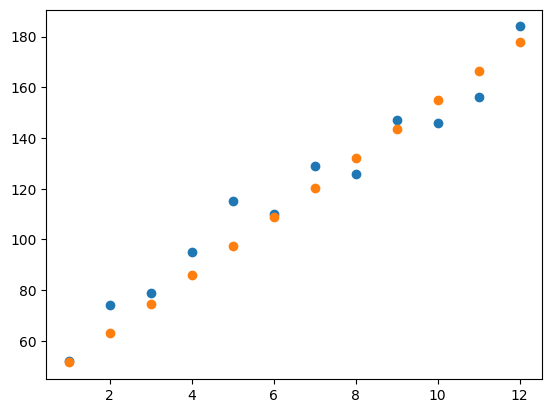

In [5]:

import matplotlib.pyplot as plt
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#slope:
m = 11.5
#intercept:
b = 40

y = [(month*m + b) for month in months]


plt.plot(months, revenue, "o")
plt.plot(months, y, "o")
plt.show()




## Loss

When we think about how we can assign a slope and intercept to fit a set of points, we have to define what the best fit is.

For each data point, we calculate loss, a number that measures how bad the model’s (in this case, the line’s) prediction was. You may have seen this being referred to as error.

We can think about loss as the squared distance from the point to the line. We do the squared distance (instead of just the distance) so that points above and below the line both contribute to total loss in the same way:

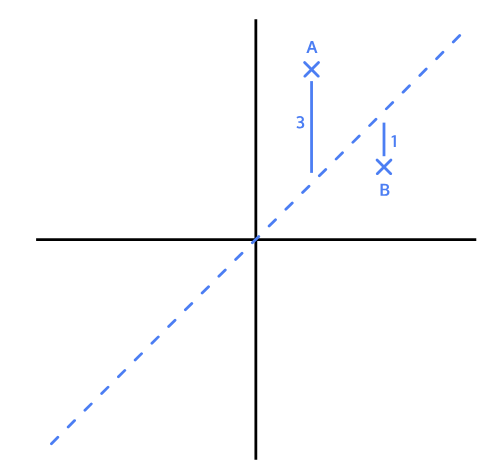

In this example:

For point A, the squared distance is 9 (3²)
For point B, the squared distance is 1 (1²)
So the total loss, with this model, is 10. If we found a line that had less loss than 10, that line would be a better model for this data.

In [6]:
x = [1, 2, 3]
y = [5, 1, 3]

#y = x
m1 = 1
b1 = 0
y_predicted1 = [x*m1+b1 for x in x]

#y = 0.5x + 1
m2 = 0.5
b2 = 1
y_predicted2 = [x*m2+b2 for x in x]

total_loss1 = 0
for y1,y2 in zip(y_predicted1,y):
  total_loss1 += (y2-y1)**2

total_loss2 = 0
for y1,y2 in zip(y_predicted2,y):
  total_loss2 += (y2-y1)**2

print(total_loss1, total_loss2)
better_fit = 2

17 13.5


## Gradient Descent for Intercept

As we try to minimize loss, we take each parameter we are changing, and move it as long as we are decreasing loss. It’s like we are moving down a hill, and stop once we reach the bottom:


The process by which we do this is called gradient descent. We move in the direction that decreases our loss the most. Gradient refers to the slope of the curve at any point.

For example, let’s say we are trying to find the intercept for a line. We currently have a guess of 10 for the intercept. At the point of 10 on the curve, the slope is downward. Therefore, if we increase the intercept, we should be lowering the loss. So we follow the gradient downwards.


We derive these gradients using calculus. It is not crucial to understand how we arrive at the gradient equation. To find the gradient of loss as intercept changes, the formula comes out to be:

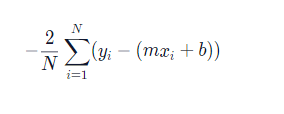

-N is the number of points we have in our dataset
-m is the current gradient guess
-b is the current intercept guess

Basically:

-we find the sum of y_value - (m*x_value + b) for all the y_values and x_values we have
-and then we multiply the sum by a factor of -2/N. N is the number of points we have.

In [7]:
def get_gradient_at_b(x,y,m,b):
  diff = sum([(y-(m*x+b)) for x,y in zip(x,y)])
  b_gradient = -2*diff/len(x)
  return b_gradient


In [8]:
def get_gradient_at_b(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff  
  return b_gradient

def get_gradient_at_m(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff  
  return m_gradient

# Define your step_gradient function here

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# current intercept guess:
b = 0
# current slope guess:
m = 0

# Call your function here to update b and m
def step_gradient(x,y,b_current,m_current):
  b_gradient = get_gradient_at_b(x, y, b_current, m_current)
  m_gradient = get_gradient_at_m(x, y, b_current, m_current)
  b = b_current - (0.01 * b_gradient)
  m = m_current - (0.01 * m_gradient)
  return b,m
b,m = step_gradient(months,revenue,b,m)
print(b, m)

2.355 17.78333333333333


## Convergence

How do we know when we should stop changing the parameters m and b? How will we know when our program has learned enough?

To answer this, we have to define convergence. Convergence is when the loss stops changing (or changes very slowly) when parameters are changed.

Hopefully, the algorithm will converge at the best values for the parameters m and b.

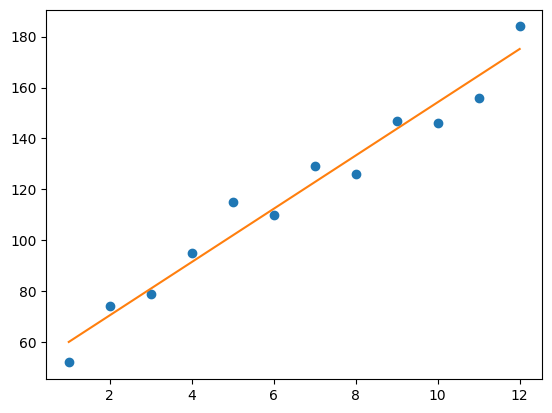

In [11]:

import matplotlib.pyplot as plt

def get_gradient_at_b(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff  
  return b_gradient

def get_gradient_at_m(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff  
  return m_gradient

#Your step_gradient function here
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]
  
#Your gradient_descent function here:  

def gradient_descent(x,y,learning_rate,num_iterations):
  m = 0
  b = 0
  for i in range(num_iterations):
    b,m = step_gradient(b,m,x,y,learning_rate)
  return b,m

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#Uncomment the line below to run your gradient_descent function
b, m = gradient_descent(months, revenue, 0.01, 1000)

#Uncomment the lines below to see the line you've settled upon!
y = [m*x + b for x in months]

plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()




## Scikit-Learn

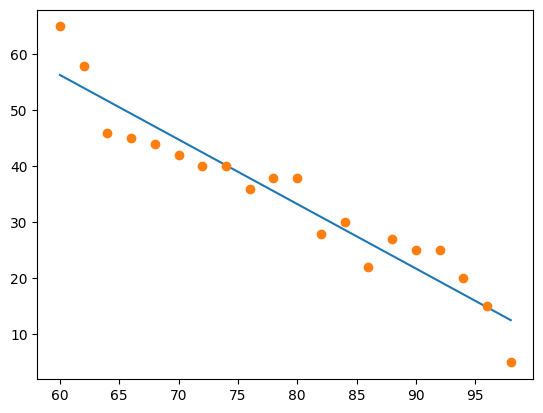

In [12]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

temperature = np.array(range(60, 100, 2))
temperature = temperature.reshape(-1, 1)
sales = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]



line_fitter = LinearRegression()
line_fitter.fit(temperature,sales)

sales_predict = line_fitter.predict(temperature)
plt.plot(temperature, sales_predict)
plt.plot(temperature, sales, 'o')
plt.show()

## Honey Production

Now that you have learned how linear regression works, let’s try it on an example of real-world data.

As you may have already heard, the honeybees are in a precarious state right now. You may have seen articles about the decline of the honeybee population for various reasons. You want to investigate this decline and how the trends of the past predict the future for the honeybees.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("honeyproduction.csv")

In [3]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [6]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


In [7]:
X = prod_per_year.year
X = X.values.reshape(-1,1)

In [8]:
y = prod_per_year.totalprod


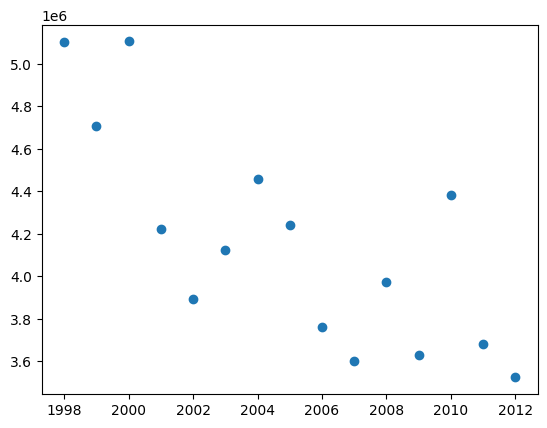

In [9]:
plt.scatter(X,y)
plt.show()

In [10]:
regr = linear_model.LinearRegression()

In [11]:
regr.fit(X,y)

LinearRegression()

In [12]:
print(regr.coef_)
print(regr.intercept_)

[-88303.18915238]
181208083.10732976


In [13]:
y_predict = regr.predict(X)

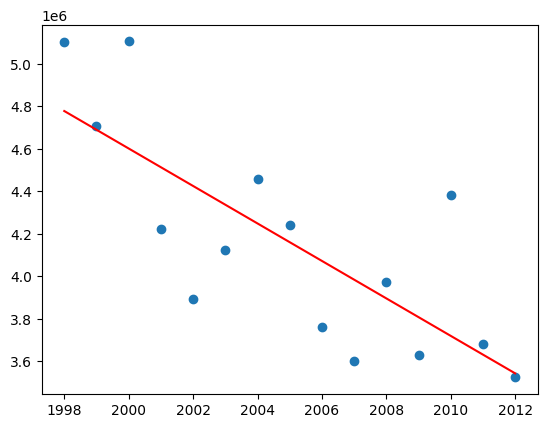

In [15]:
plt.scatter(X,y)
plt.plot(X,y_predict,'r')
plt.show()


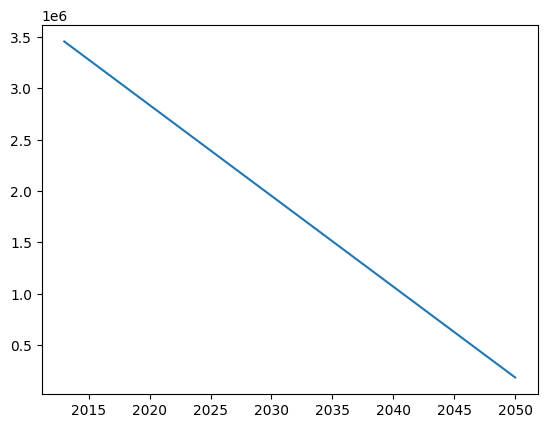

In [16]:
X_future = np.array(range(2013,2051))
X_future = X_future.reshape(-1,1)

future_predict = regr.predict(X_future)

plt.plot(X_future,future_predict)
plt.show()

In [17]:
print(f'{0.25e6} will be the mean of honey production in 2050')

250000.0 will be the mean of honey production in 2050
